# Kaggle Learn-and-compete `Poker Rule Induction`

## Data Description

You are provided with 25,010 poker hands in train.csv and 1,000,000 in test.csv. Each hand consists of five cards with a given suit and rank, drawn from a standard deck of 52. Suits and ranks are represented as ordinal categories:

```
S1 “Suit of card #1”
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}
C1 “Rank of card #1”
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

...

S5 “Suit of card #5”
C5 “Rank of card #5”
```

Each row in the training set has the accompanying class label for the poker hand it comprises. The hands are omitted from the test set and must be predicted by participants. Hands are classified into the following ordinal categories:


```
0: Nothing in hand; not a recognized poker hand 
1: One pair; one pair of equal ranks within five cards
2: Two pairs; two pairs of equal ranks within five cards
3: Three of a kind; three equal ranks within five cards
4: Straight; five cards, sequentially ranked with no gaps
5: Flush; five cards with the same suit
6: Full house; pair + different rank three of a kind
7: Four of a kind; four equal ranks within five cards
8: Straight flush; straight + flush
9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush
```
Note that the Straight flush and Royal flush hands are not representative of
the true domain because they have been over-sampled. The straight flush
is 14.43 times more likely to occur in the training set, while the royal flush is 129.82 times more likely.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from functools import reduce

#### Read data

In [2]:
test_dataset = pd.read_csv('test.csv', delimiter=',')

In [3]:
test_dataset

,id,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,10,2,2,3,3,3,8,1,1
1,2,2,13,3,5,3,7,4,6,1,4
2,3,1,3,1,11,2,8,2,1,2,4
3,4,1,6,3,3,4,7,1,8,3,11
4,5,2,10,3,4,1,6,2,12,2,6
5,6,1,4,3,10,2,11,2,6,1,7
6,7,1,10,3,8,1,4,3,11,3,9
7,8,2,11,3,8,1,1,1,11,2,3
8,9,3,4,1,1,1,3,3,5,3,6
9,10,3,12,2,1,1,3,1,2,3,10


In [4]:
train_dataset = pd.read_csv('train.csv', delimiter=',')

In [5]:
data = train_dataset[['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5']]
labels = train_dataset[['hand']]

In [6]:
data[0:10]

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,4,9,2,1,2,2,4,7,2,8
1,1,4,3,6,1,12,3,11,2,7
2,1,11,4,1,3,7,4,11,2,1
3,2,9,2,4,3,6,1,9,4,9
4,1,8,2,4,2,11,2,2,2,1
5,2,5,1,5,2,13,2,3,3,13
6,3,10,4,6,1,4,2,13,4,5
7,4,10,3,1,2,13,4,2,4,7
8,3,2,4,10,3,3,4,4,1,9
9,2,7,3,8,4,8,2,13,2,12


In [7]:
labels_vect = tf.keras.utils.to_categorical(labels)

#### One hot encoding

In [8]:
def data_hotencode(data, columns, encoder, mode='transform'):
    encoded = None
    if (mode == 'fit'):
        encoded = encoder.fit_transform(data[columns])
    elif (mode == 'transform'):
        encoded = encoder.transform(data[columns])
        print(encoded.toarray)
    return pd.concat([data.drop(columns, axis=1), pd.DataFrame(encoded.toarray())], axis=1)

def hand_hotencode(hand, columns, encoder):
    df = pd.DataFrame(data=[hand], columns=['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5'])
    return data_hotencode(df, columns, encoder, 'transform')

In [9]:
encoder = OneHotEncoder()
columns_to_hotencode = ['S1', 'S2', 'S3', 'S4', 'S5']
data_encoded = data_hotencode(data, columns_to_hotencode, encoder, 'fit')
print(data_encoded.shape)

data_encoded.head()

(25010, 25)


,C1,C2,C3,C4,C5,0,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
0,9,1,2,7,8,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,4,6,12,11,7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,11,1,7,11,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,9,4,6,9,9,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8,4,11,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Normalization

In [10]:
def normalize(data, columns):
    scaler = preprocessing.StandardScaler().fit(data[columns])
    data_normalized = pd.DataFrame(scaler.transform(data[columns]))
    to_return = pd.concat([data.drop(columns, axis=1), data_normalized], axis=1)
    to_return.columns = list(range(to_return.shape[1]))
    return to_return

In [11]:
columns_to_normalize = ['C1', 'C2', 'C3', 'C4', 'C5']
data_normalized = normalize(data_encoded, columns_to_normalize)
data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.534641,-1.596591,-1.338929,0.015355,0.277232
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.798789,-0.269239,1.331370,1.082855,0.009960
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.068012,-1.596591,-0.003780,1.082855,-1.593673
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.534641,-0.800179,-0.270810,0.549105,0.544504
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.267955,-0.800179,1.064340,-1.319020,-1.593673


#### 52 encoding

In [12]:
def data_52encode(data):
    columns = []
    for i in range(1, 5):
        for j in range(1, 14):
            columns.append(str(i) + str(j))
    
    data_squashed = pd.DataFrame()
    for i in range(1, 6):
        column_S = 'S'+str(i)
        column_C = 'C' + str(i)
        data_squashed[column_S+column_C] = data[column_S].astype(str) + data[column_C].astype(str)
    
    data_encoded = pd.DataFrame(data = np.zeros((data.shape[0], len(columns))), columns=columns)
    
    for i in range(data.shape[0]):
        row = data_squashed.iloc[i, :]
        for col in data_squashed.columns:
            data_encoded[row[col]][i] = 1
    
    return data_encoded

In [13]:
data_52encoded = data_52encode(data)

In [38]:
def get_hand_df(hand):
    return pd.DataFrame({
        'S1': [hand[0]],
        'C1': [hand[1]],
        'S2': [hand[2]],
        'C2': [hand[3]],
        'S3': [hand[4]],
        'C3': [hand[5]],
        'S4': [hand[6]],
        'C4': [hand[7]],
        'S5': [hand[8]],
        'C5': [hand[9]],
    })

#### Test function

In [12]:
def calc_hand_label(hand):    
    def f(hand):
        suits_hist = reduce(lambda d,x: {**d, **{x: (d.get(x, 0) + 1)}}, hand[:,0], {})
        ranks_hist = reduce(lambda d,x: {**d, **{x: (d.get(x, 0) + 1)}}, hand[:,1], {})
        
        if len(ranks_hist.values()) < 5:
            if len(ranks_hist.values()) == 2:
                if max(list(ranks_hist.values())) == 4:
                    return 7
    #                 print('7: Four of a kind; four equal ranks within five cards')
                else:
                    return 6
    #                 print('6 Full house; pair + different rank three of a kind')
            elif len(ranks_hist.values()) == 3:
                if max(list(ranks_hist.values())) == 3:
                    return 3
    #                 print('3: Three of a kind; three equal ranks within five cards')
                else:
                    return 2
    #                 print('2: Two pairs; two pairs of equal ranks within five cards')
            else:
                return 1
    #             print('1: One pair; one pair of equal ranks within five cards')
        else:
            if len(suits_hist.values()) == 1:
                if max(list(ranks_hist.keys())) -  min(list(ranks_hist.keys())) == 4:
                    if max(list(ranks_hist.keys())) == 13:
                        return 9
    #                     print('9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush')
                    else:
                        return 8
    #                     print('8: Straight flush; straight + flush')
                else:
                    return 5
    #                 print('5: Flush; five cards with the same suit')
            elif max(list(ranks_hist.keys())) -  min(list(ranks_hist.keys())) == 4:
                return 4    
    #             print('4: Straight; five cards, sequentially ranked with no gaps')
            else:
                return 0
                print('0: Nothing in hand; not a recognized poker hand ')
                
    hand = np.array(hand).reshape(5,2)
    res1 = f(hand)
    
    hand[:,1] = list(map(lambda x: 13 if (x == 1) else x-1, hand[:,1]))
    res2 = f(hand)
    
    if res1 == 9 and res2 == 8:
        return res2
    else:
        return max(res1, res2)

#### Encode cards

In [13]:
def card_encode(s, c):
    cards=["A","2","3","4","5","6","7","8","9","10","J","Q","K"]
    suits="♥♦♣♠"
    return cards[c - 1] + suits[s - 1]

def hand_encode(hand):
    return ', '.join(map(lambda x: card_encode(hand[x*2], hand[x*2+1]),range(5)))

print(hand_encode([4,9,2,1,2,2,4,7,2,8]))
print(hand_encode([2,9,2,4,3,6,1,9,4,9]))

9♠, A♦, 2♦, 7♠, 8♦
9♦, 4♦, 6♣, 9♥, 9♠


### Solutions

1. Neural network
2. Random forest

Ousiders:
 - Genetic algorithm
 - Decision tree

In [24]:
def shuffle_columns(data, columns):
    shuffled = data[columns].reindex(np.random.permutation(data[columns].columns), axis=1)
    return pd.concat([data.drop(columns, axis=1), shuffled], axis=1)

### Neural Network

In [33]:
from time import time
from keras.callbacks import TensorBoard

model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(25,)))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Dropout(0.2))
# Add another:
model.add(keras.layers.Dense(32, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.train.AdamOptimizer(0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

model.fit(np.array(data_normalized), np.array(labels_vect), epochs=100, batch_size=32)
shuffled = shuffle_columns(data_normalized, list(range(20,25)))
model.fit(np.array(shuffled), np.array(labels_vect), epochs=100, batch_size=32)
shuffled = shuffle_columns(data_normalized, list(range(20,25)))
model.fit(np.array(shuffled), np.array(labels_vect), epochs=100, batch_size=32)
shuffled = shuffle_columns(data_normalized, list(range(20,25)))
model.fit(np.array(shuffled), np.array(labels_vect), epochs=100, batch_size=32)
shuffled = shuffle_columns(data_normalized, list(range(20,25)))
model.fit(np.array(shuffled), np.array(labels_vect), epochs=100, batch_size=32)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


Using TensorFlow backend.


Epoch 1/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 42us/step - loss: 1.0548 - acc: 0.5065

Epoch 2/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.9613 - acc: 0.5402

Epoch 3/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.9527 - acc: 0.5434

Epoch 4/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.9484 - acc: 0.5450

Epoch 5/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 40us/step - loss: 0.9441 - acc: 0.5512

Epoch 6/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.9409 - acc: 0.5541

Epoch 7/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 

25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.7825 - acc: 0.650825010 [===================>..........] - ETA: 0s - loss: 0.7779 - acc: 

Epoch 56/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.7806 - acc: 0.6514

Epoch 57/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.7786 - acc: 0.6515: 0s - loss: 0.7740 - acc

Epoch 58/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step - loss: 0.7772 - acc: 0.6519

Epoch 59/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 39us/step - loss: 0.7759 - acc: 0.6532

Epoch 60/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.7732 - acc: 0.6571

Epoch 61/100
25010/25010 [=========

25010/25010 [==============================]25010/25010 [==============================] - 1s 46us/step - loss: 0.6945 - acc: 0.6931: 0s - loss: 0.6911 - acc: 

Epoch 65/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.6933 - acc: 0.6950

Epoch 66/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.6914 - acc: 0.6956

Epoch 67/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 40us/step - loss: 0.6918 - acc: 0.6942

Epoch 68/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.6909 - acc: 0.6978

Epoch 69/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.6893 - acc: 0.6984

Epoch 70/100
25010/25010 [==============================]25010/25010 [==============================] - 

25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.6411 - acc: 0.7117

Epoch 75/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step - loss: 0.6379 - acc: 0.7138

Epoch 76/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.6350 - acc: 0.7154

Epoch 77/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.6356 - acc: 0.7142

Epoch 78/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.6341 - acc: 0.7153

Epoch 79/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.6347 - acc: 0.7136

Epoch 80/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.6320

25010/25010 [==============================]25010/25010 [==============================] - 1s 46us/step - loss: 0.6875 - acc: 0.6870

Epoch 30/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 42us/step - loss: 0.6833 - acc: 0.6891

Epoch 31/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 44us/step - loss: 0.6822 - acc: 0.6908

Epoch 32/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 42us/step - loss: 0.6813 - acc: 0.6914

Epoch 33/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 44us/step - loss: 0.6780 - acc: 0.6916

Epoch 34/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.6743 - acc: 0.6944

Epoch 35/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 46us/step - loss: 0.6728

25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.5876 - acc: 0.7366

Epoch 85/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.5860 - acc: 0.7370

Epoch 86/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.5869 - acc: 0.7382

Epoch 87/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.5843 - acc: 0.7381

Epoch 88/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.5830 - acc: 0.7407

Epoch 89/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.5783 - acc: 0.7431

Epoch 90/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.5817

25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.4213 - acc: 0.8261

Epoch 94/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.4202 - acc: 0.8255

Epoch 95/100
25010/25010 [==============================]23648/25010 [===========================>..] - ETA: 0s - loss: 0.4131 - acc: 0.82825010/25010 [==============================] - 1s 36us/step - loss: 0.4154 - acc: 0.8276

Epoch 96/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.4176 - acc: 0.8293

Epoch 97/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.4115 - acc: 0.8288

Epoch 98/100
25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.4139 - acc: 0.8292

Epoch 99/100
25010/25010 [=======================

In [34]:
y_test = test_dataset.drop(['id'], axis=1).apply(calc_hand_label, axis=1)

9♥, 10♥, J♥, Q♥, A♥
<bound method _cs_matrix.toarray of <1x20 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>>
[  8.28537662e-28   6.27207737e-06   2.49999645e-03   9.97390926e-01
   7.49544904e-19   2.42813733e-36   1.02781363e-04   2.05954621e-14
   6.91645529e-30   0.00000000e+00]


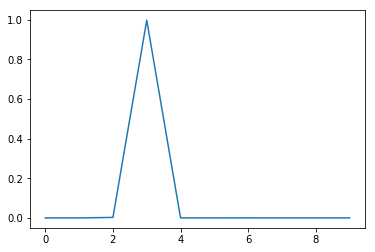

In [46]:
test_hand = [1,9,1,10,1,11,1,12,1,1]
print(hand_encode(test_hand))
prediction = model.predict(np.array(normalize(hand_hotencode(test_hand, columns_to_hotencode, encoder), columns_to_normalize)))
print(prediction[0])
plt.plot(prediction[0])

In [76]:
model.save('./model-100')

### Predictions

In [19]:
test_dataset_noid = test_dataset.drop(['id'], axis=1)

In [21]:
test_sample = test_dataset_noid[0:10000]
test_data_sample_encoded = data_52encode(test_sample)

In [22]:
model = keras.models.load_model('./model-100')
model.compile(optimizer=tf.train.AdamOptimizer(0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [36]:
test_data_sample_predicted_10 = model.predict(np.array(test_data_sample_encoded))
test_data_sample_predicted = np.array(list(map(np.argmax, test_data_sample_predicted_10)))
test_data_sample_labels = y_test[0:10000]
diff = test_data_sample_predicted - np.array(test_data_sample_labels)
total_error = diff.sum()
df = pd.DataFrame({'predicted': test_data_sample_predicted, 'real': test_data_sample_labels})
df = pd.concat([test_sample, df], axis=1)
df[df['predicted'] != df['real']][0:10]

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,predicted,real
17,3,7,1,6,1,4,3,12,3,6,0,1
126,1,10,3,7,2,7,4,7,4,10,3,6
320,1,4,3,1,4,4,2,2,3,2,3,2
327,4,7,2,12,2,5,4,5,1,5,2,3
330,3,8,2,6,1,7,2,7,3,7,2,3
469,1,7,3,12,4,10,2,12,2,10,1,2
665,3,4,3,5,3,3,3,1,3,2,0,8
821,1,10,1,5,1,2,1,4,2,12,5,0
863,4,4,4,3,1,12,3,4,3,12,1,2
903,1,10,4,1,2,10,3,1,2,3,1,2


In [37]:
df[df['predicted'] != df['real']][0:10].drop(['predicted', 'real'], axis=1).apply(lambda h: hand_encode(np.array(h)), axis=1)

17       7♣, 6♥, 4♥, Q♣, 6♣
126    10♥, 7♣, 7♦, 7♠, 10♠
320      4♥, A♣, 4♠, 2♦, 2♣
327      7♠, Q♦, 5♦, 5♠, 5♥
330      8♣, 6♦, 7♥, 7♦, 7♣
469    7♥, Q♣, 10♠, Q♦, 10♦
665      4♣, 5♣, 3♣, A♣, 2♣
821     10♥, 5♥, 2♥, 4♥, Q♦
863      4♠, 3♠, Q♥, 4♣, Q♣
903    10♥, A♠, 10♦, A♣, 3♦
dtype: object